In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np


In [2]:
df = pd.read_csv('covid_19_indiaa.csv', parse_dates=['Date'], dayfirst=True)


In [3]:
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

In [6]:
#Looking at the earlier dates
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [7]:
#looking at the latest dates
df.tail()

,date,state,cured,deaths,confirmed
9286,2020-12-09,Telengana,266120,1480,275261
9287,2020-12-09,Tripura,32169,373,32945
9288,2020-12-09,Uttarakhand,72435,1307,79141
9289,2020-12-09,Uttar Pradesh,528832,7967,558173
9290,2020-12-09,West Bengal,475425,8820,507995


In [8]:
df.describe()

,cured,deaths,confirmed
count,9.291000e+03,9291.000000,9.291000e+03
mean,7.863266e+04,1487.620385,9.183978e+04
std,1.931102e+05,4713.813690,2.166014e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,1.520000e+02,2.000000,5.385000e+02
50%,4.308000e+03,66.000000,6.832000e+03
75%,5.772650e+04,926.500000,7.885600e+04
max,1.737080e+06,47827.000000,1.859367e+06


In [9]:
#current date
today = df[df.date == '2020-07-17']

In [10]:
today

,date,state,cured,deaths,confirmed
4179,2020-07-17,Andaman and Nicobar Islands,133,0,180
4180,2020-07-17,Andhra Pradesh,19393,492,38044
4181,2020-07-17,Arunachal Pradesh,153,3,543
4182,2020-07-17,Assam,12888,48,19754
4183,2020-07-17,Bihar,14018,197,21764
4184,2020-07-17,Chandigarh,476,11,651
4185,2020-07-17,Chhattisgarh,3451,21,4732
4186,2020-07-17,Dadra and Nagar Haveli and Daman and Diu,371,2,552
4187,2020-07-17,Delhi,97693,3545,118645
4188,2020-07-17,Goa,1817,19,3108


In [11]:
#Sorting data w.r.t number of confirmed cases
max_confirmed_cases=today.sort_values(by="confirmed",ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4194,2020-07-17,Karnataka,19729,1032,51422
4189,2020-07-17,Gujarat,32103,2089,45481
4212,2020-07-17,Uttar Pradesh,26675,1046,43441
4209,2020-07-17,Telangana,27295,396,41018
4180,2020-07-17,Andhra Pradesh,19393,492,38044
4213,2020-07-17,West Bengal,21415,1023,36117
4206,2020-07-17,Rajasthan,19970,538,27174


In [12]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]

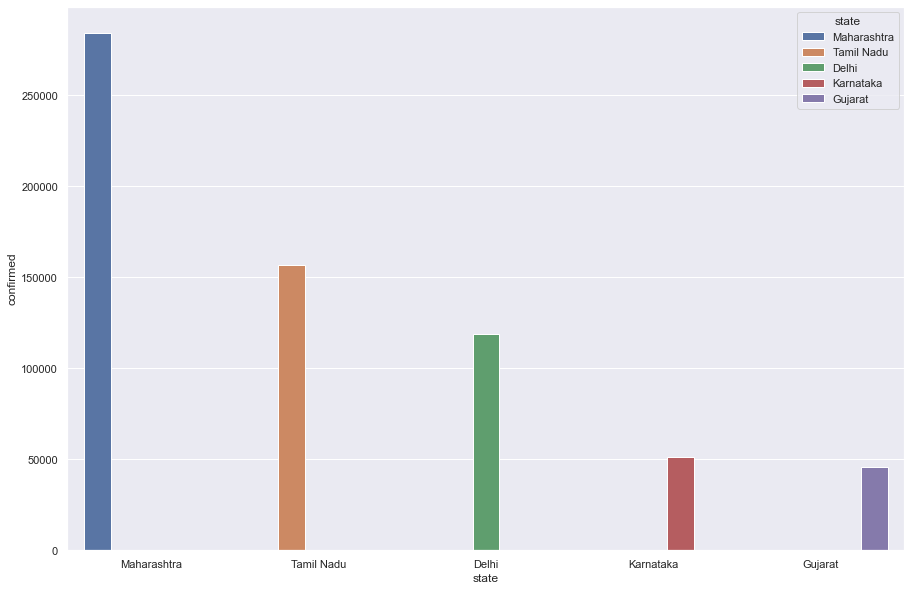

In [13]:
#Making bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

In [14]:
#Sorting data w.r.t number of death cases
max_death_cases=today.sort_values(by="deaths",ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4187,2020-07-17,Delhi,97693,3545,118645
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4189,2020-07-17,Gujarat,32103,2089,45481
4212,2020-07-17,Uttar Pradesh,26675,1046,43441
4194,2020-07-17,Karnataka,19729,1032,51422
4213,2020-07-17,West Bengal,21415,1023,36117
4197,2020-07-17,Madhya Pradesh,14127,689,20378
4206,2020-07-17,Rajasthan,19970,538,27174
4180,2020-07-17,Andhra Pradesh,19393,492,38044


In [15]:
#Getting states with maximum number of death cases
top_states_death=max_death_cases[0:5]

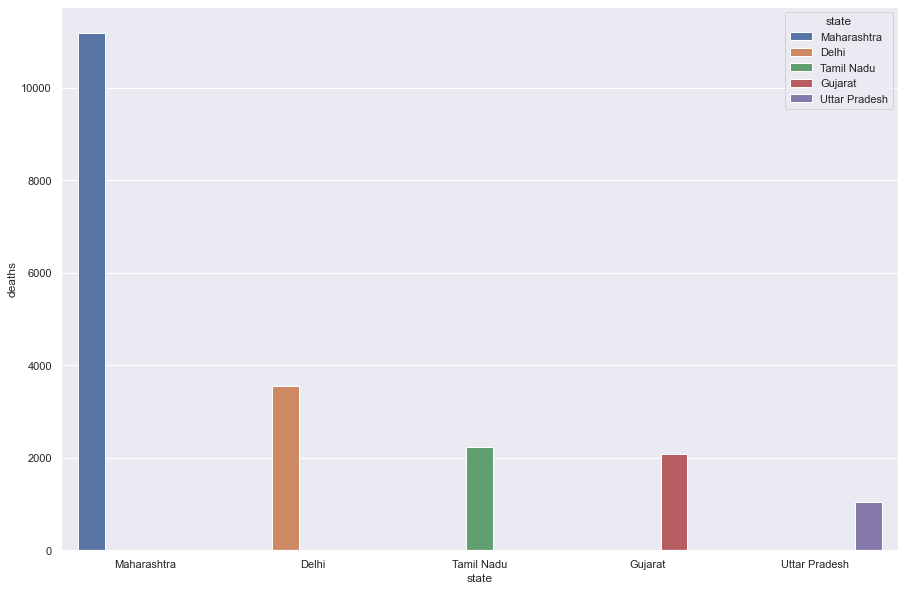

In [16]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

In [17]:
#Sorting data w.r.t number of cured cases
max_cured_cases=today.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4189,2020-07-17,Gujarat,32103,2089,45481
4209,2020-07-17,Telangana,27295,396,41018
4212,2020-07-17,Uttar Pradesh,26675,1046,43441
4213,2020-07-17,West Bengal,21415,1023,36117
4206,2020-07-17,Rajasthan,19970,538,27174
4194,2020-07-17,Karnataka,19729,1032,51422
4180,2020-07-17,Andhra Pradesh,19393,492,38044


In [18]:
#Getting states with maximum number of cured cases
top_states_cured=max_cured_cases[0:5]

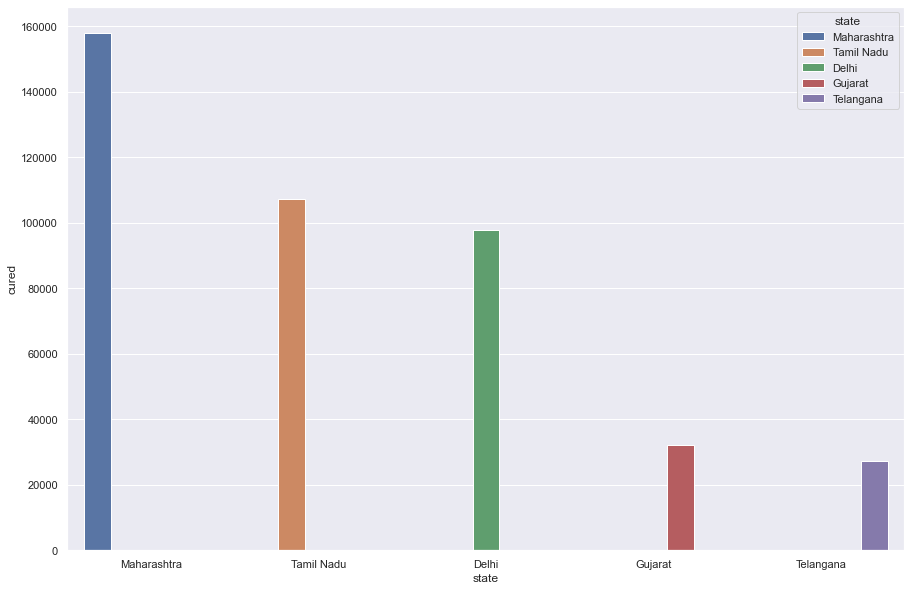

In [19]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

In [20]:
#Maharashtra
maha = df[df.state == 'Maharashtra']

In [21]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
9135,2020-12-05,Maharashtra,1710050,47599,1842587
9170,2020-12-06,Maharashtra,1715884,47694,1847509
9205,2020-12-07,Maharashtra,1723370,47734,1852266
9240,2020-12-08,Maharashtra,1730715,47774,1855341


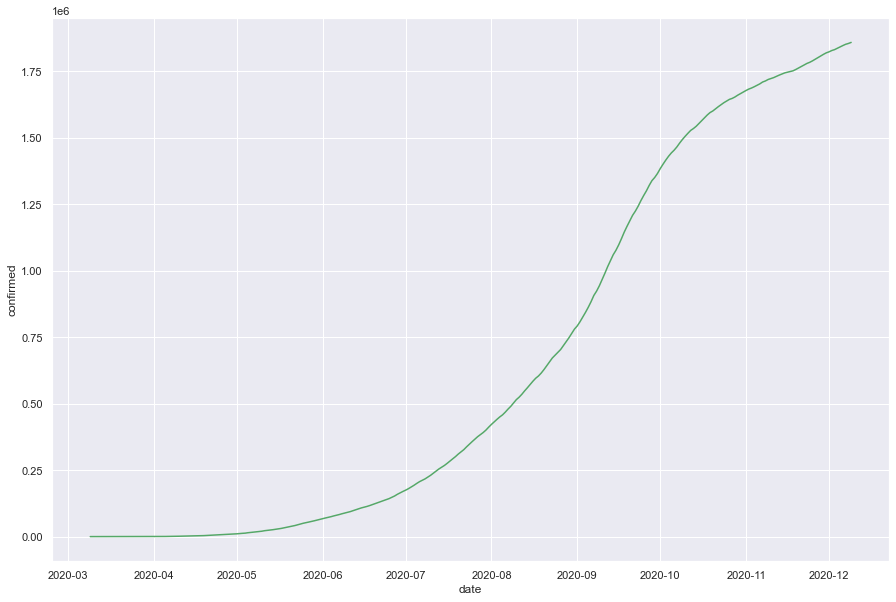

In [22]:
#Visualizing confirmed cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")
plt.show()

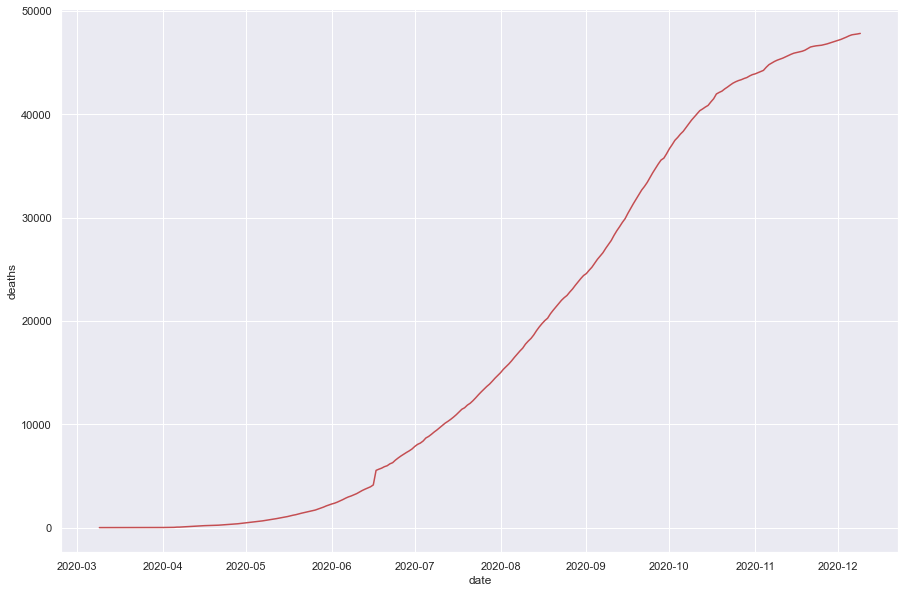

In [23]:
#Visualizing death cases in maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=maha,color="r")
plt.show()

In [24]:
#kerala
kerala= df[df.state == 'Kerala']
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
9132,2020-12-05,Kerala,561874,2358,625767
9167,2020-12-06,Kerala,567694,2390,631615
9202,2020-12-07,Kerala,572911,2418,636392
9237,2020-12-08,Kerala,577616,2441,639664


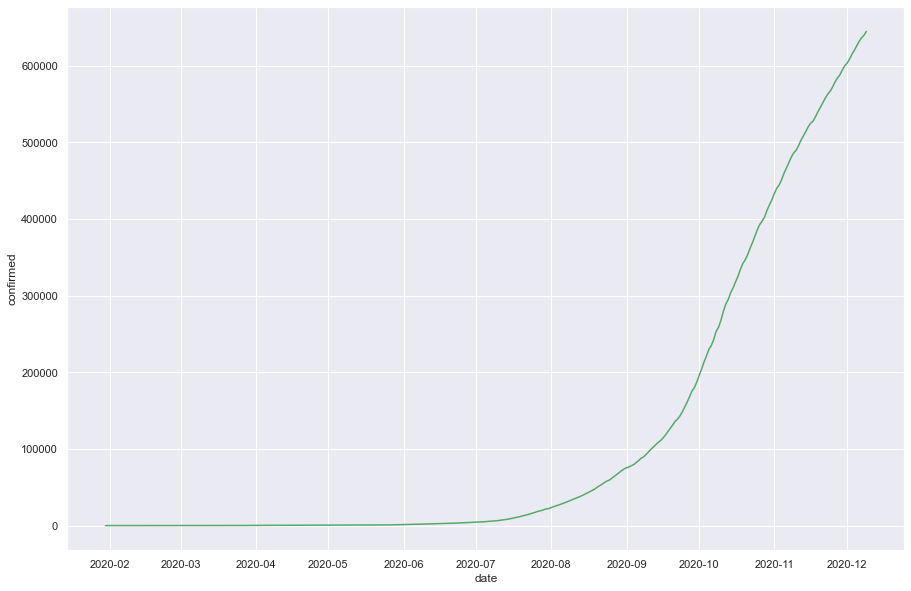

In [25]:
#Visualizing confirmed cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")
plt.show()

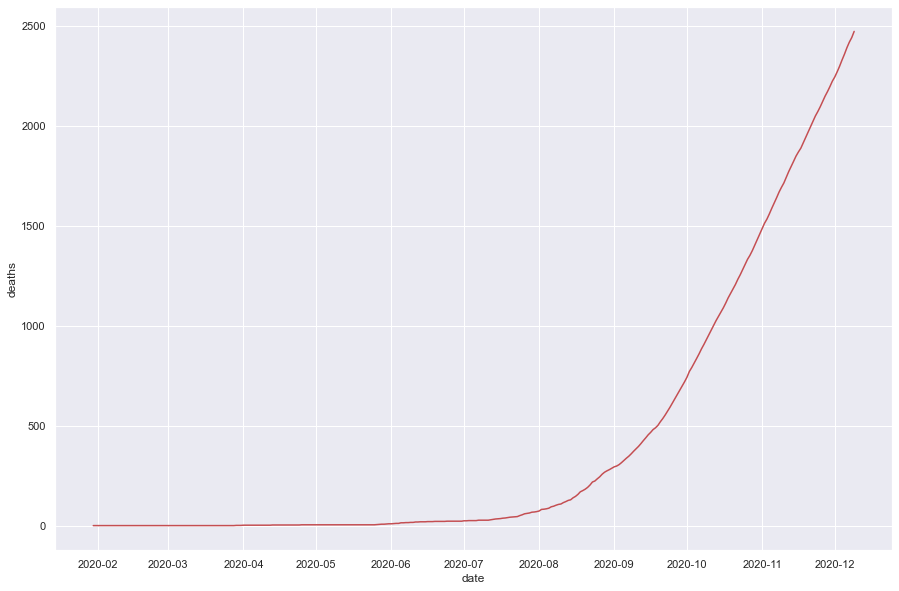

In [26]:
#Visualizing death cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=kerala,color="r")
plt.show()

In [27]:
#Jammu and Kashmir
jk= df[df.state == 'Jammu and Kashmir']
jk

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
9129,2020-12-05,Jammu and Kashmir,105537,1730,112256
9164,2020-12-06,Jammu and Kashmir,106006,1742,112757
9199,2020-12-07,Jammu and Kashmir,106372,1746,113288
9234,2020-12-08,Jammu and Kashmir,106758,1755,113568


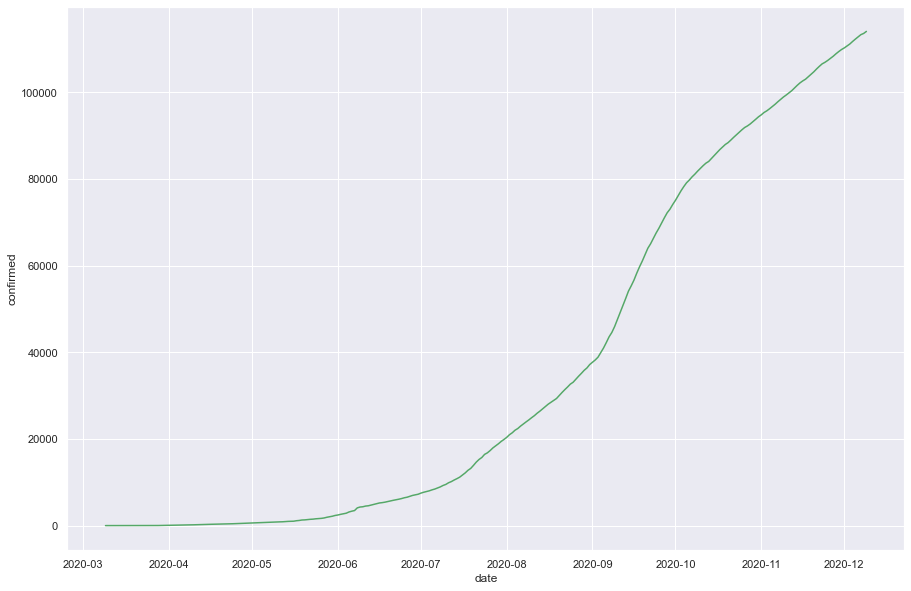

In [28]:
#Visualizing confirmed cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="confirmed",data=jk,color="g")
plt.show()

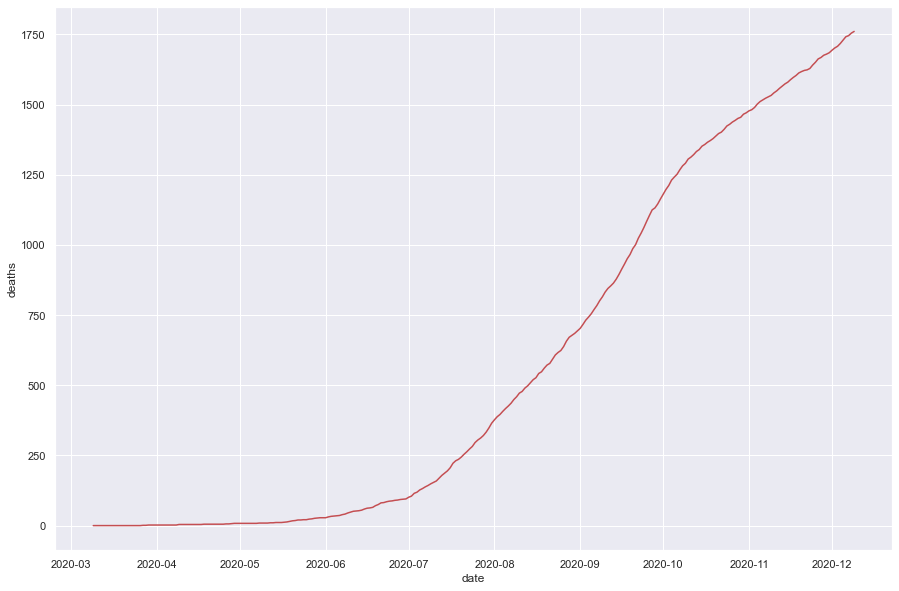

In [29]:
#Visualizing death cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="deaths",data=jk,color="r")
plt.show()

In [30]:
#Checking state-wise testing details
tests = pd.read_csv('StatewiseTestingDetails.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
8061,2020-12-04,West Bengal,6047279.0,NaN,NaN
8062,2020-12-05,West Bengal,6091668.0,NaN,NaN
8063,2020-12-06,West Bengal,6135854.0,NaN,NaN
8064,2020-12-07,West Bengal,6167307.0,NaN,NaN


In [31]:
test_latest =  tests[tests.Date == '2020-07-15']

In [32]:
test_latest

,Date,State,TotalSamples,Negative,Positive
62,2020-07-15,Andaman and Nicobar Islands,19061.0,NaN,176.0
304,2020-07-15,Andhra Pradesh,1217963.0,1182512,35451.0
537,2020-07-15,Arunachal Pradesh,34619.0,32450,491.0
758,2020-07-15,Assam,589202.0,NaN,18666.0
1002,2020-07-15,Bihar,337212.0,NaN,20173.0
1245,2020-07-15,Chandigarh,10050.0,9385,619.0
1480,2020-07-15,Chhattisgarh,222113.0,NaN,4556.0
1705,2020-07-15,Dadra and Nagar Haveli and Daman and Diu,37392.0,36195,552.0
1894,2020-07-15,Delhi,736436.0,NaN,116993.0
2132,2020-07-15,Goa,99234.0,NaN,2951.0


In [33]:
#Sorting data w.r.t number of cured cases
max_tests_State=test_latest.sort_values(by="TotalSamples",ascending=False)
max_tests_State

,Date,State,TotalSamples,Negative,Positive
6777,2020-07-15,Tamil Nadu,1736747.0,NaN,151820.0
4496,2020-07-15,Maharashtra,1413185.0,1132434,280751.0
7426,2020-07-15,Uttar Pradesh,1277241.0,NaN,41383.0
304,2020-07-15,Andhra Pradesh,1217963.0,1182512,35451.0
6321,2020-07-15,Rajasthan,1123902.0,1091930,26437.0
3597,2020-07-15,Karnataka,902026.0,831246,47253.0
1894,2020-07-15,Delhi,736436.0,NaN,116993.0
7919,2020-07-15,West Bengal,649928.0,NaN,34427.0
758,2020-07-15,Assam,589202.0,NaN,18666.0
4250,2020-07-15,Madhya Pradesh,540483.0,516780,19643.0


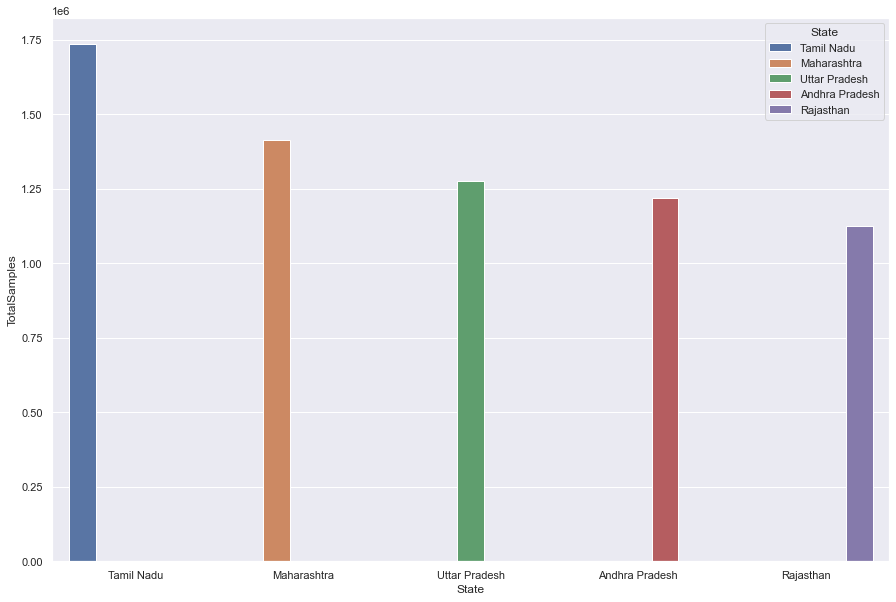

In [34]:
#Making bar-plot for states with max test cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="State",y="TotalSamples",data=max_tests_State[0:5],hue="State")
plt.show()

In [35]:
#Linear regression
from sklearn.model_selection import train_test_split

In [36]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
9135,2020-12-05,Maharashtra,1710050,47599,1842587
9170,2020-12-06,Maharashtra,1715884,47694,1847509
9205,2020-12-07,Maharashtra,1723370,47734,1852266
9240,2020-12-08,Maharashtra,1730715,47774,1855341


In [37]:
#converting date-time to ordinal
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha.head()

<ipython-input-37-669bfd237a7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [39]:
#getting dependent variable and inpedent variable
x=maha['date']
y=maha['confirmed']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
y_train

8715    1780208
5215     572734
546         302
7350    1554389
3118     113445
         ...   
7665    1632544
977        2687
8470    1747242
1987      29100
5040     515332
Name: confirmed, Length: 192, dtype: int64

In [44]:
x_train

8715    737752
5215    737652
546     737516
7350    737713
3118    737593
         ...  
7665    737722
977     737530
8470    737745
1987    737561
5040    737647
Name: date, Length: 192, dtype: int64

In [45]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [46]:
maha.tail()

,date,state,cured,deaths,confirmed
9135,737764,Maharashtra,1710050,47599,1842587
9170,737765,Maharashtra,1715884,47694,1847509
9205,737766,Maharashtra,1723370,47734,1852266
9240,737767,Maharashtra,1730715,47774,1855341
9275,737768,Maharashtra,1737080,47827,1859367


In [54]:
lr.predict(np.array([[737768]]))

array([[1766025.92664528]])

In [47]:
import datetime as dt
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)
df#convert data column to ordinal

,date,state,cured,deaths,confirmed
0,737454,Kerala,0,0,1
1,737455,Kerala,0,0,1
2,737456,Kerala,0,0,2
3,737457,Kerala,0,0,3
4,737458,Kerala,0,0,3
...,...,...,...,...,...
9286,737768,Telengana,266120,1480,275261
9287,737768,Tripura,32169,373,32945
9288,737768,Uttarakhand,72435,1307,79141
9289,737768,Uttar Pradesh,528832,7967,558173


In [48]:
df=df._get_numeric_data()#drop categorical column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   date       9291 non-null   int64
 1   cured      9291 non-null   int64
 2   deaths     9291 non-null   int64
 3   confirmed  9291 non-null   int64
dtypes: int64(4)
memory usage: 290.5 KB


In [49]:
y = df["confirmed"].values
# Select the other columns as feature
X = df.drop('confirmed', axis = 1)#select total case as target variable

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)#train test spli

In [51]:
from sklearn.linear_model import LinearRegression#linear regression modelling
lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
acc = lin.score(X_test,y_test)
print("Accuracy :", 100*acc, "%")#getting


Accuracy : 99.3706690200629 %


In [52]:
test = np.array(X_train.iloc[80])
test = np.reshape(test,(1,-1))
print("predicted value of confirmed :", lin.predict(test))
# total cases in given data
print("confirmed in given data :", y_train[80])

predicted value of confirmed : [609131.83768343]
confirmed in given data : 654385


In [53]:
from sklearn.ensemble import RandomForestRegressor#random forest Regressor modelling
from sklearn.tree import DecisionTreeRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = rf.score(X_test,y_test)
print("Accuracy :", 100*rf_acc,"%")#getting accuracy

Accuracy : 99.8850542972966 %


In [109]:
test = np.array(X_train.iloc[130])
test = np.reshape(test,(1,-1))
print("Predicted value of total_cases :", rf.predict(test))
print("confirmed in given data :", y_train[130])

Predicted value of total_cases : [62.97659091]
confirmed in given data : 55


In [63]:
X_train.iloc[-2].values

array([737526,      5,      0], dtype=int64)

In [70]:
rf.predict([[737,49548.0,40084.0]])#predict the total case using random forest regressor

array([106059.7])

In [115]:
#changing date into ordinal number
from datetime import datetime as dt
from datetime import datetime
date = datetime.strptime('2021-07-07', '%Y-%M-%d')
date.toordinal()

737797

In [ ]:
737433